# Import Necessary Library

In [101]:
import json

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sysadm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [102]:
!pip install nlp_utils

import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random
import nlp_utils as nu
from collections import Counter


In [103]:
from torch.utils import data

import string
string.punctuation

!pip install langid
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [104]:
# Tokenize the text and remove stopwords and punctuation
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sysadm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sysadm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1

!pip install indic-transliteration

from indic_transliteration import sanscript



In [106]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

# Open and parse the JSON file

In [107]:
# Open and parse the JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [108]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [109]:
# Open and parse the JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [110]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# To view in Every coversation

# Total number of  episode in Train data

In [11]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]
    emotions = conversation["emotions"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# To view all episode name

In [112]:
total_episodes_1

['roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 '

# Distinct Episode name in coversation

In [13]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))


Unique episode names: {'kavi.wmv', 'husbandsdonotcheat.avi', 'scrabblecompetition.avi', 'roseshpoetrypublication.wmv', 'playatcharityfunction', 'doggy', 'dushyant', 'sahillovestory.wmv', 'mayabetmonisha.wmv', 'mayanighmare', 'mayamonishabday.avi', 'roseshaccident', 'roseshnayadon.wmv', 'cricket.wmv', 'khilawal.wmv', 'roseshmarriesrita.wmw', 'neelimaverma.wmv', 'finale.avi', 'introductiontothesarabhaifamily.avi', 'african', 'mayaleavesindravardhan.wmv', 'patang', 'yamraj.wmv', 'mayadoubtsindravardhan.wmv', 'monishaadaptstohighsociety', 'mayaleavesindravardhan(1) (1).wmv', 'lease2.wmv', 'popatlal', 'jugalkishore.wmv', 'video1.wmv', 'newcar', 'monishasuicideattempt.wmv', 'radhabaileaves', 'jaspal.wmv', 'indravadanmissing.avi', 'election', 'bachlorparty', 'sharman.wmw', 'mayaonacleaningdrive.wmv', 'prankonindravadhan', 'prefinale', 'soniyaprediction.avi', 'monishacomplainsofsahil.wmv', 'bachelor.wmv', 'lease1.wmv', 'monishasspeechonmaya.wmv', 'baldev', 'sahilmarriesmonisha.wmv', 'roseshant

# To find how many times each episode name occurs in conversation

In [14]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")


roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

Convert all utterance of each episode into a single DataFrame 

In [15]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
final_df = pd.concat(conversation_data, ignore_index=True)
final_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


 Save the DataFrame to a CSV file

In [16]:
# Save the DataFrame to a CSV file
#final_df.to_csv('./final_data_1.csv', index=False)


In [113]:
#validation_data

In [18]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


give the episode number for each episode starting with 1

 find how many distinct emotions exist in training conversation

In [19]:
# Find distinct emotions
distinct_emotions = final_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


In [20]:
# Find distinct emotions
distinct_emotions = val_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
neutral
contempt
sadness
fear
joy
surprise
anger
disgust


Visualise the emotion status count in training conversation

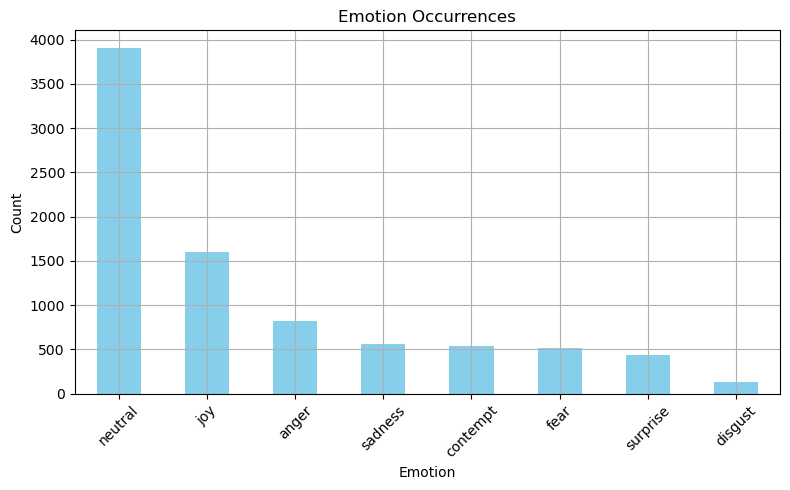

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = final_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()


Visualise the emotion status in percentage on overall training conversation

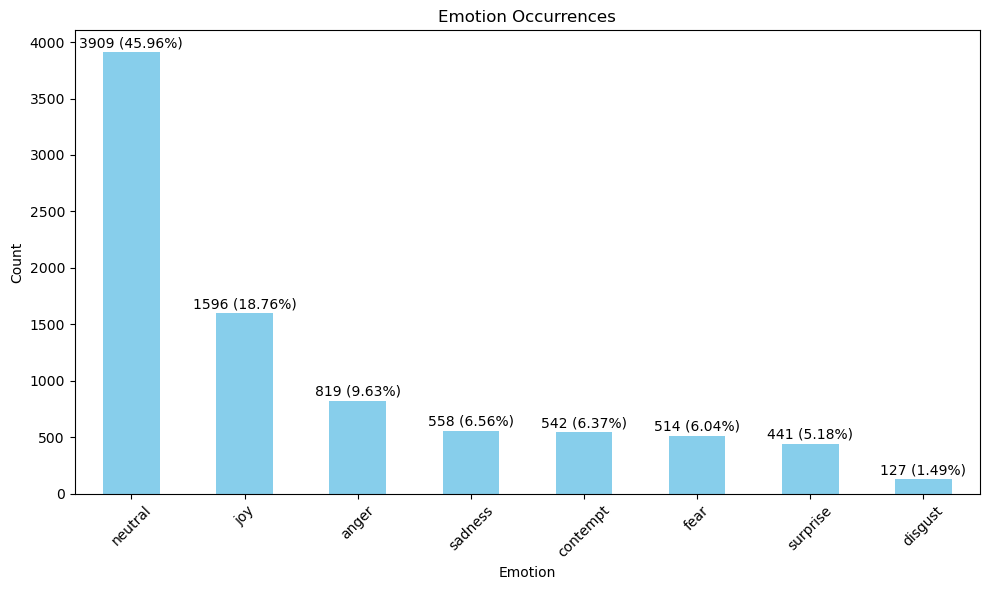

In [22]:
import matplotlib.pyplot as plt

# Assuming you already have 'distinct_emotions' and 'data' from your previous code

# Count the occurrences of each emotion
emotion_counts = final_df['Emotions'].value_counts()

# Calculate the percentage of each emotion
total_emotions = len(final_df)
emotion_percentages = (emotion_counts / total_emotions) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentage labels above each bar
for i, v in enumerate(emotion_counts):
    ax.text(i, v + 20, f'{v} ({emotion_percentages[i]:.2f}%)', ha='center', va='bottom')

# Show the plot
#plt.savefig("./emotionoccures.png")
plt.show()


# Define the Hindi Stopwords

In [23]:
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

['अत',
 'अपना',
 'अपनी',
 'अपने',
 'अभी',
 'अंदर',
 'आदि',
 'आप',
 'इत्यादि',
 'इन',
 'इनका',
 'इन्हीं',
 'इन्हें',
 'इन्हों',
 'इस',
 'इसका',
 'इसकी',
 'इसके',
 'इसमें',
 'इसी',
 'इसे',
 'उन',
 'उनका',
 'उनकी',
 'उनके',
 'उनको',
 'उन्हीं',
 'उन्हें',
 'उन्हों',
 'उस',
 'उसके',
 'उसी',
 'उसे',
 'एक',
 'एवं',
 'एस',
 'ऐसे',
 'और',
 'कई',
 'कर',
 'करता',
 'करते',
 'करना',
 'करने',
 'करें',
 'कहते',
 'कहा',
 'का',
 'काफ़ी',
 'कि',
 'कितना',
 'किन्हें',
 'किन्हों',
 'किया',
 'किर',
 'किस',
 'किसी',
 'किसे',
 'की',
 'कुछ',
 'कुल',
 'के',
 'को',
 'कोई',
 'कौन',
 'कौनसा',
 'गया',
 'घर',
 'जब',
 'जहाँ',
 'जा',
 'जितना',
 'जिन',
 'जिन्हें',
 'जिन्हों',
 'जिस',
 'जिसे',
 'जीधर',
 'जैसा',
 'जैसे',
 'जो',
 'तक',
 'तब',
 'तरह',
 'तिन',
 'तिन्हें',
 'तिन्हों',
 'तिस',
 'तिसे',
 'तो',
 'था',
 'थी',
 'थे',
 'दबारा',
 'दिया',
 'दुसरा',
 'दूसरे',
 'दो',
 'द्वारा',
 'न',
 'नके',
 'नहीं',
 'ना',
 'निहायत',
 'नीचे',
 'ने',
 'पर',
 'पहले',
 'पूरा',
 'पे',
 'फिर',
 'बनी',
 'बही',
 'बहुत',
 'बाद',
 'बाला',
 'ब

In [24]:
# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

In [25]:
# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]

# Print the lowercase transliterated words
print(lowercase_transliterated_text)

['ata', 'apana', 'apani', 'apane', 'abhi', 'amdara', 'adi', 'apa', 'ityadi', 'ina', 'inaka', 'inhim', 'inhem', 'inhom', 'isa', 'isaka', 'isaki', 'isake', 'isamem', 'isi', 'ise', 'una', 'unaka', 'unaki', 'unake', 'unako', 'unhim', 'unhem', 'unhom', 'usa', 'usake', 'usi', 'use', 'eka', 'evam', 'esa', 'aise', 'aura', 'kai', 'kara', 'karata', 'karate', 'karana', 'karane', 'karem', 'kahate', 'kaha', 'ka', 'kafi', 'ki', 'kitana', 'kinhem', 'kinhom', 'kiya', 'kira', 'kisa', 'kisi', 'kise', 'ki', 'kucha', 'kula', 'ke', 'ko', 'koi', 'kauna', 'kaunasa', 'gaya', 'ghara', 'jaba', 'jaha.n', 'ja', 'jitana', 'jina', 'jinhem', 'jinhom', 'jisa', 'jise', 'jidhara', 'jaisa', 'jaise', 'jo', 'taka', 'taba', 'taraha', 'tina', 'tinhem', 'tinhom', 'tisa', 'tise', 'to', 'tha', 'thi', 'the', 'dabara', 'diya', 'dusara', 'dusare', 'do', 'dvara', 'na', 'nake', 'nahim', 'na', 'nihayata', 'niche', 'ne', 'para', 'pahale', 'pura', 'pe', 'phira', 'bani', 'bahi', 'bahuta', 'bada', 'bala', 'bilakula', 'bhi', 'bhitara', '

In [26]:
#print the hindi stopwords
hindi_stopwords = lowercase_transliterated_text
hindi_stopwords

['ata',
 'apana',
 'apani',
 'apane',
 'abhi',
 'amdara',
 'adi',
 'apa',
 'ityadi',
 'ina',
 'inaka',
 'inhim',
 'inhem',
 'inhom',
 'isa',
 'isaka',
 'isaki',
 'isake',
 'isamem',
 'isi',
 'ise',
 'una',
 'unaka',
 'unaki',
 'unake',
 'unako',
 'unhim',
 'unhem',
 'unhom',
 'usa',
 'usake',
 'usi',
 'use',
 'eka',
 'evam',
 'esa',
 'aise',
 'aura',
 'kai',
 'kara',
 'karata',
 'karate',
 'karana',
 'karane',
 'karem',
 'kahate',
 'kaha',
 'ka',
 'kafi',
 'ki',
 'kitana',
 'kinhem',
 'kinhom',
 'kiya',
 'kira',
 'kisa',
 'kisi',
 'kise',
 'ki',
 'kucha',
 'kula',
 'ke',
 'ko',
 'koi',
 'kauna',
 'kaunasa',
 'gaya',
 'ghara',
 'jaba',
 'jaha.n',
 'ja',
 'jitana',
 'jina',
 'jinhem',
 'jinhom',
 'jisa',
 'jise',
 'jidhara',
 'jaisa',
 'jaise',
 'jo',
 'taka',
 'taba',
 'taraha',
 'tina',
 'tinhem',
 'tinhom',
 'tisa',
 'tise',
 'to',
 'tha',
 'thi',
 'the',
 'dabara',
 'diya',
 'dusara',
 'dusare',
 'do',
 'dvara',
 'na',
 'nake',
 'nahim',
 'na',
 'nihayata',
 'niche',
 'ne',
 'para',


# combined list of stopwords for both English and Hindi

In [27]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(hindi_stopwords)  # Add your Hindi stopwords here
hindi_stop_words

stop_words.update(hindi_stop_words)
stop_words

{'a',
 'abhi',
 'about',
 'above',
 'adi',
 'after',
 'again',
 'against',
 'ain',
 'aise',
 'all',
 'am',
 'amdara',
 'an',
 'and',
 'any',
 'apa',
 'apana',
 'apane',
 'apani',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'ata',
 'aura',
 'bada',
 'bahi',
 'bahuta',
 'bala',
 'bani',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bhi',
 'bhitara',
 'bilakula',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'dabara',
 'did',
 'didn',
 "didn't",
 'diya',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'dusara',
 'dusare',
 'dvara',
 'each',
 'eka',
 'esa',
 'evam',
 'few',
 'for',
 'from',
 'further',
 'gaya',
 'ghara',
 'had',
 'hadn',
 "hadn't",
 'hai',
 'haim',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'hi',
 'him',
 'himself',
 'his',
 'ho',
 'hona',
 'hone',
 'hota',
 'hote',
 'hoti',
 'how',
 'hua',
 'hue',
 'hui',
 'i',
 'if',
 

# Preprocessing code for each utterance

In [28]:
import string
from nltk.corpus import stopwords

# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text


In [29]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...	')

'kya kya bhar rakha indravadan gha'

Apply preprocessing to the 'Utterances' column

In [30]:
# Apply preprocessing to the 'Utterances' column
final_df['Clean_text'] = final_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
final_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi 17000 ghadi momma recurring alarm ...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


In [31]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,sahil sahil sahil sirf 4 din bache sari ladkiy...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,mummy ji unme pasand nhi
1352,prefinale,sahil,rosesh ko?,neutral,rosesh


taken the clean text column and emotion column

In [32]:
# Assuming your DataFrame is named "df"
selected_columns = final_df[["Clean_text", "Emotions"]]
dt = selected_columns[0:100]
dt

,Clean_text,Emotions
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust
1,ok chalo rosesh chalo bahar,contempt
2,momma hath chhodiye dad,anger
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral
4,indravadan tum kitne salo joke maar aaj tak,neutral
...,...,...
95,vah wala pani lekar aao,neutral
96,okay,neutral
97,hello mujhe batao tum ro kyon,anger
98,momma momma wo mujhe maarna chahti sahil bhai,sadness


In [33]:
# Assuming your DataFrame is named "df"
val_selected_columns = val_df[["Clean_text", "Emotions"]]
vd = val_selected_columns[0:100]
vd

,Clean_text,Emotions
0,kya kar rosesh bharat tera desh bhartiya insan...,neutral
1,hahaha khat padh le rosesh baby padhne de hame...,neutral
2,kavita acchi lekin khayal achcha nahin villain...,neutral
3,galat par momma tumse bar brush karna aur tumn...,contempt
4,galat per,neutral
...,...,...
95,maya mar gai,neutral
96,momma,sadness
97,dekhne kya,neutral
98,thank god khana mil,neutral


In [68]:
import pandas as pd

# Assuming your DataFrame is named "df"
selected_columns = final_df[["Clean_text", "Emotions"]]

# Assuming your DataFrame is named "df"
val_selected_columns = val_df[["Clean_text", "Emotions"]]

# Concatenating the dataframes vertically
concatenated_df = pd.concat([selected_columns, val_selected_columns], ignore_index=True)

# Display the concatenated dataframe
concatenated_df


,Clean_text,Emotions
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust
1,ok chalo rosesh chalo bahar,contempt
2,momma hath chhodiye dad,anger
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral
4,indravadan tum kitne salo joke maar aaj tak,neutral
...,...,...
9855,sahil sahil sahil sirf 4 din bache sari ladkiy...,fear
9856,haan lekin mom unn charo ek finalise kar lengi,neutral
9857,mummy ji unme pasand nhi,sadness
9858,rosesh,neutral


# BAG OF WORDS MODEL

In [69]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer  # Changed to CountVectorizer



# Sample code-mixed data (replace with your DataFrame)
data = concatenated_df

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features = 13000)  # You can adjust max_features as needed

# Fit and transform the text data
count_features = count_vectorizer.fit_transform(data['Clean_text'])


In [70]:

# Convert the DataFrame to the bag of words features
count_df = pd.DataFrame(count_features.toarray(), columns=count_vectorizer.get_feature_names_out())

# Concatenate the bag of words features with the original DataFrame
whole_data = pd.concat([data, count_df], axis=1)
whole_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ok chalo rosesh chalo bahar,contempt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,momma hath chhodiye dad,anger,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indravadan tum kitne salo joke maar aaj tak,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,sahil sahil sahil sirf 4 din bache sari ladkiy...,fear,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9856,haan lekin mom unn charo ek finalise kar lengi,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9857,mummy ji unme pasand nhi,sadness,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9858,rosesh,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
train_data = whole_data.iloc[:8506]
train_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ok chalo rosesh chalo bahar,contempt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,momma hath chhodiye dad,anger,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indravadan tum kitne salo joke maar aaj tak,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,lekin ghadi 17000 ghadi momma recurring alarm ...,sadness,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8502,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun,anger,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8503,ahan,joy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8504,goodbye,fear,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Assuming your target variable is "Emotions"
X_train = train_data.drop(["Emotions", "Clean_text"], axis=1).values  
y_train = train_data["Emotions"]  # Target variable


In [73]:
val_data = whole_data.iloc[8506:]
val_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
8506,kya kar rosesh bharat tera desh bhartiya insan...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8507,hahaha khat padh le rosesh baby padhne de hame...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8508,kavita acchi lekin khayal achcha nahin villain...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8509,galat par momma tumse bar brush karna aur tumn...,contempt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8510,galat per,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,sahil sahil sahil sirf 4 din bache sari ladkiy...,fear,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9856,haan lekin mom unn charo ek finalise kar lengi,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9857,mummy ji unme pasand nhi,sadness,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9858,rosesh,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Assuming your target variable is "Emotions"
X_test = val_data.drop(["Emotions", "Clean_text"], axis=1).values  
y_test = val_data["Emotions"]  # Target variable


In [75]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [76]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_linear = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_linear)

              precision    recall  f1-score   support

       anger       0.22      0.22      0.22       118
    contempt       0.15      0.08      0.11        74
     disgust       0.33      0.10      0.15        21
        fear       0.19      0.11      0.14        88
         joy       0.40      0.26      0.31       228
     neutral       0.53      0.76      0.62       633
     sadness       0.20      0.08      0.11       126
    surprise       0.17      0.06      0.09        66

    accuracy                           0.44      1354
   macro avg       0.27      0.21      0.22      1354
weighted avg       0.39      0.44      0.40      1354

Confusion Matrix:
 [[ 26   3   1   4   9  68   5   2]
 [  8   6   0   6  13  37   3   1]
 [  3   3   2   0   1  12   0   0]
 [  5   2   0  10   7  54   9   1]
 [ 15   4   1   9  59 126   9   5]
 [ 47  12   2  15  50 484  15   8]
 [ 10   7   0   5   8  83  10   3]
 [  3   2   0   3   1  53   0   4]]
Accuracy: 0.44387001477104876


In [77]:
from sklearn.naive_bayes import MultinomialNB
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_naive = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_naive)


Classification Report:
               precision    recall  f1-score   support

       anger       0.19      0.07      0.10       118
    contempt       0.25      0.01      0.03        74
     disgust       0.00      0.00      0.00        21
        fear       0.11      0.01      0.02        88
         joy       0.41      0.24      0.30       228
     neutral       0.49      0.89      0.63       633
     sadness       0.22      0.02      0.03       126
    surprise       0.25      0.03      0.05        66

    accuracy                           0.47      1354
   macro avg       0.24      0.16      0.15      1354
weighted avg       0.37      0.47      0.36      1354

Confusion Matrix:
 [[  8   1   0   0   8 100   1   0]
 [  3   1   0   0  11  58   1   0]
 [  5   0   0   0   1  15   0   0]
 [  1   0   0   1   6  78   2   0]
 [  4   0   0   2  54 164   0   4]
 [ 15   1   0   5  45 563   2   2]
 [  5   1   0   1   6 111   2   0]
 [  1   0   0   0   2  60   1   2]]
Accuracy: 0.4660265878877

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.svm import SVC
# Train an SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_svm_pred = svm_classifier.predict(X_test)

# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_svm_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_poly = accuracy_score(y_test, y_svm_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_poly)



SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.25      0.01      0.03        74
     disgust       0.00      0.00      0.00        21
        fear       0.17      0.01      0.02        88
         joy       0.00      0.00      0.00       228
     neutral       0.47      0.98      0.63       633
     sadness       0.12      0.01      0.01       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.46      1354
   macro avg       0.13      0.13      0.09      1354
weighted avg       0.26      0.46      0.30      1354

SVM Confusion Matrix:
 [[  0   0   0   0   0 118   0   0]
 [  0   1   0   1   0  72   0   0]
 [  0   1   0   0   0  20   0   0]
 [  0   0   0   1   1  85   1   0]
 [  1   0   1   1   0 223   2   0]
 [  3   1   1   2   1 621   4   0]
 [  2   1   0   1   0 121   1   0]
 [  0   0   1   0   0  65   0   0]]
Accuracy: 0.46085

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
# Train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_lr_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_logistic = accuracy_score(y_test, y_lr_pred)

# Print the accuracy
print("Accuracy:", accuracy_logistic)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       anger       0.23      0.12      0.16       118
    contempt       0.29      0.08      0.13        74
     disgust       0.50      0.10      0.16        21
        fear       0.29      0.09      0.14        88
         joy       0.39      0.29      0.33       228
     neutral       0.51      0.82      0.63       633
     sadness       0.24      0.06      0.10       126
    surprise       0.24      0.08      0.11        66

    accuracy                           0.46      1354
   macro avg       0.33      0.20      0.22      1354
weighted avg       0.40      0.46      0.40      1354

Logistic Regression Confusion Matrix:
 [[ 14   0   0   3  11  85   4   1]
 [  7   6   0   3  10  46   1   1]
 [  1   0   2   0   2  16   0   0]
 [  5   1   0   8   6  63   5   0]
 [  3   1   1   3  65 144   6   5]
 [ 27   7   1   5  58 520  10   5]
 [  3   5   0   3  11  92   8   4]
 [  1   1   0   3   2

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_rf_pred = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_rm_forest = accuracy_score(y_test, y_rf_pred)

# Print the accuracy
print("Accuracy:", accuracy_rm_forest)


Random Forest Classification Report:
               precision    recall  f1-score   support

       anger       0.39      0.08      0.13       118
    contempt       0.00      0.00      0.00        74
     disgust       0.29      0.10      0.14        21
        fear       0.23      0.07      0.11        88
         joy       0.47      0.26      0.33       228
     neutral       0.49      0.82      0.62       633
     sadness       0.40      0.13      0.19       126
    surprise       0.25      0.26      0.26        66

    accuracy                           0.47      1354
   macro avg       0.32      0.21      0.22      1354
weighted avg       0.41      0.47      0.40      1354

Random Forest Confusion Matrix:
 [[  9   0   1   2   4  94   3   5]
 [  1   0   1   0   9  60   1   2]
 [  0   1   2   0   0  17   1   0]
 [  1   0   0   6   2  70   5   4]
 [  0   1   1   0  59 153   5   9]
 [ 11   3   1  15  48 522   9  24]
 [  1   1   1   3   4  94  16   6]
 [  0   0   0   0   0  49   0  17

**Accuracy** **table**

In [83]:
compare = pd.DataFrame({"Model":["Naive baise","SVM_poly","Random forest","Logistic regreesion","SVM_linear"],"Accuracy":[accuracy_naive*100,accuracy_svm_poly*100,accuracy_rm_forest*100,accuracy_logistic*100,accuracy_svm_linear*100]})
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
sorted_compare

,Model,Accuracy
0,Naive baise,46.602659
2,Random forest,46.602659
3,Logistic regreesion,46.381093
1,SVM_poly,46.085672
4,SVM_linear,44.387001


# TfidfVectorizer method

In [84]:

from sklearn.feature_extraction.text import TfidfVectorizer

Convert a the clean text  to the TF-IDF features  

In [85]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


# Sample code-mixed data (replace with your DataFrame)
data = concatenated_df


# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 13000)  # You can adjust max_features as needed

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(data['Clean_text'])

In [86]:
# Convert a DataFrame  to the TF-IDF features  
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
whole_data = pd.concat([data, tfidf_df], axis=1)
whole_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ok chalo rosesh chalo bahar,contempt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,momma hath chhodiye dad,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indravadan tum kitne salo joke maar aaj tak,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,sahil sahil sahil sirf 4 din bache sari ladkiy...,fear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9856,haan lekin mom unn charo ek finalise kar lengi,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9857,mummy ji unme pasand nhi,sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9858,rosesh,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
train_data = whole_data.iloc[:8506]
train_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ok chalo rosesh chalo bahar,contempt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,momma hath chhodiye dad,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indravadan tum kitne salo joke maar aaj tak,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,lekin ghadi 17000 ghadi momma recurring alarm ...,sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8502,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8503,ahan,joy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8504,goodbye,fear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Assuming your target variable is "Emotions"
X_train = train_data.drop(["Emotions", "Clean_text"], axis=1).values  
y_train = train_data["Emotions"]  # Target variable


In [89]:
val_data = whole_data.iloc[8506:]
val_data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti,zyattiyan
8506,kya kar rosesh bharat tera desh bhartiya insan...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8507,hahaha khat padh le rosesh baby padhne de hame...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8508,kavita acchi lekin khayal achcha nahin villain...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8509,galat par momma tumse bar brush karna aur tumn...,contempt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8510,galat per,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,sahil sahil sahil sirf 4 din bache sari ladkiy...,fear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9856,haan lekin mom unn charo ek finalise kar lengi,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9857,mummy ji unme pasand nhi,sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9858,rosesh,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Assuming your target variable is "Emotions"
X_test = val_data.drop(["Emotions", "Clean_text"], axis=1).values  
y_test = val_data["Emotions"]  # Target variable


In [91]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [92]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_linear = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_linear)

              precision    recall  f1-score   support

       anger       0.44      0.06      0.10       118
    contempt       0.20      0.01      0.03        74
     disgust       1.00      0.05      0.09        21
        fear       0.44      0.05      0.08        88
         joy       0.51      0.21      0.30       228
     neutral       0.50      0.94      0.65       633
     sadness       0.43      0.05      0.09       126
    surprise       0.36      0.08      0.12        66

    accuracy                           0.49      1354
   macro avg       0.48      0.18      0.18      1354
weighted avg       0.47      0.49      0.38      1354

Confusion Matrix:
 [[  7   0   0   0   2 109   0   0]
 [  2   1   0   0   7  62   1   1]
 [  2   2   1   0   0  15   1   0]
 [  1   0   0   4   3  79   1   0]
 [  2   0   0   0  48 172   2   4]
 [  2   0   0   1  30 595   3   2]
 [  0   1   0   1   3 113   6   2]
 [  0   1   0   3   2  55   0   5]]
Accuracy: 0.49261447562776955


Naive Bayes classifier

In [93]:
from sklearn.naive_bayes import MultinomialNB
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_naive = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_naive)


Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.85      0.07      0.14       228
     neutral       0.47      1.00      0.64       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.48      1354
   macro avg       0.17      0.13      0.10      1354
weighted avg       0.36      0.48      0.32      1354

Confusion Matrix:
 [[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   3  71   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0  17 211   0   0]
 [  0   0   0   0   0 633   0   0]
 [  0   0   0   0   0 126   0   0]
 [  0   0   0   0   0  66   0   0]]
Accuracy: 0.4800590841949

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classifier(kernel='poly')

In [94]:
from sklearn.svm import SVC
# Train an SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_svm_pred = svm_classifier.predict(X_test)

# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_svm_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_poly = accuracy_score(y_test, y_svm_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_poly)



SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.25      0.02      0.03       118
    contempt       0.00      0.00      0.00        74
     disgust       1.00      0.05      0.09        21
        fear       0.33      0.01      0.02        88
         joy       0.49      0.10      0.17       228
     neutral       0.48      0.96      0.64       633
     sadness       1.00      0.01      0.02       126
    surprise       0.32      0.12      0.18        66

    accuracy                           0.47      1354
   macro avg       0.48      0.16      0.14      1354
weighted avg       0.47      0.47      0.34      1354

SVM Confusion Matrix:
 [[  2   0   0   0   1 115   0   0]
 [  0   0   0   0   4  69   0   1]
 [  2   0   1   0   1  17   0   0]
 [  0   0   0   1   0  86   0   1]
 [  1   0   0   0  23 201   0   3]
 [  3   0   0   2  12 607   0   9]
 [  0   0   0   0   5 117   1   3]
 [  0   0   0   0   1  57   0   8]]
Accuracy: 0.47488

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
# Train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_lr_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_logistic = accuracy_score(y_test, y_lr_pred)

# Print the accuracy
print("Accuracy:", accuracy_logistic)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       anger       0.53      0.08      0.15       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.29      0.02      0.04        88
         joy       0.49      0.22      0.31       228
     neutral       0.49      0.92      0.64       633
     sadness       0.44      0.06      0.11       126
    surprise       0.29      0.11      0.16        66

    accuracy                           0.49      1354
   macro avg       0.32      0.18      0.18      1354
weighted avg       0.43      0.49      0.39      1354

Logistic Regression Confusion Matrix:
 [[ 10   0   0   0   4 104   0   0]
 [  0   0   0   0   7  65   1   1]
 [  2   1   0   0   0  17   1   0]
 [  1   0   0   2   2  81   2   0]
 [  3   0   0   0  51 167   2   5]
 [  3   0   0   1  34 583   4   8]
 [  0   0   0   2   4 109   8   3]
 [  0   0   0   2   3

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_rf_pred = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_rm_forest = accuracy_score(y_test, y_rf_pred)

# Print the accuracy
print("Accuracy:", accuracy_rm_forest)


Random Forest Classification Report:
               precision    recall  f1-score   support

       anger       0.29      0.05      0.09       118
    contempt       0.11      0.01      0.02        74
     disgust       0.67      0.10      0.17        21
        fear       0.30      0.03      0.06        88
         joy       0.50      0.21      0.29       228
     neutral       0.49      0.90      0.63       633
     sadness       0.54      0.06      0.10       126
    surprise       0.32      0.15      0.21        66

    accuracy                           0.48      1354
   macro avg       0.40      0.19      0.20      1354
weighted avg       0.44      0.48      0.38      1354

Random Forest Confusion Matrix:
 [[  6   0   1   0   3 108   0   0]
 [  3   1   0   0   6  62   1   1]
 [  2   2   2   0   0  14   1   0]
 [  0   0   0   3   4  80   0   1]
 [  1   1   0   1  47 172   1   5]
 [  8   2   0   6  32 571   3  11]
 [  1   3   0   0   2 110   7   3]
 [  0   0   0   0   0  56   0  10

compare the all accuracy of different classifier

In [99]:
compare = pd.DataFrame({"Model":["Naive baise","SVM_poly","Random forest","Logistic regreesion","SVM_linear"],"Accuracy":[accuracy_naive*100,accuracy_svm_poly*100,accuracy_rm_forest*100,accuracy_logistic*100,accuracy_svm_linear*100]})
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
sorted_compare

,Model,Accuracy
4,SVM_linear,49.261448
3,Logistic regreesion,48.818316
0,Naive baise,48.005908
2,Random forest,47.784343
1,SVM_poly,47.488922
